In [46]:
import scipy
from scipy.constants import pi
from scipy.constants import hbar
import numpy as np
import math
import time
import random
import os
#import seaborn as sns
import matplotlib.pylab as plt



In [47]:
#######


def lorentzian_dist(x, x0, a, gam):
    return a * gam**2 / ((0.5 * gam)**2 + (x - x0)**2)


### my code that works ###
def random_choice(x_ls, distributions, N0):
    random_number = random.choices(x_ls, distributions, k=int(N0))
    return random_number


In [48]:
# quantum echo parameters

#(omega, t, p_0, q_0, mu_1, mu_2, delta_)
### parameters for the Lorentzian distribution
omega_0 = 7.5
gamma = 0.5
a = 1/np.pi

### parameters of the forces acting on the oscillators
Delta = 10
mu1 = 5 # 2 for smaller figure
mu2 = 2.5 # 5 for smaller figure

### shared initial condition of the oscillator
p0 = 100
q0 = 25
N0 = 1e5


t_mesh = 1000
Sigma_t_ls = np.linspace(0, Delta, t_mesh)
Xi_t_ls = np.linspace(Delta, 3*Delta, 2*t_mesh)



For the quantum oscillators, we define: $\Xi(t) = \langle \Psi | Q^2 |\Psi \rangle $

Eq. 8 defines the $\Xi(t) = \Sigma (t)$ for $0 < t < \Delta$

\begin{equation}
\Sigma (t) / \Xi_0 = \left( 1 + \frac{2\mu_1^2}{\Omega^2} \right) 
+ \frac{2\mu_1^2}{\Omega}\sin 2\Omega t 
- \frac{2 \mu_1^2}{\Omega^2}\cos 2\Omega t
\end{equation}

where $\Xi_0 = \hbar /2 \Omega$



In [49]:
def Xi_0_calc(omega_):
    return hbar/(2*omega_)

def Sigma_t_over_xi0_func(omega_, t, p_0, q_0, mu_1):
    sigma_t1 = 1 + (2* (mu_1**2)/(omega_**2))
    sigma_t2 = np.sin(2*omega_*t)*(2*mu_1/omega_)
    sigma_t3 = np.cos(2*omega_*t)*(2*(mu_1**2)/(omega_**2))
    Sigma_t = sigma_t1+sigma_t2-sigma_t3
    Xi_0_val = Xi_0_calc(omega_)
    return Sigma_t
    
def Sigma_t_sum_func(sample_ls, t_sigma_t, p_0, q_0, mu_1):
    Sigma_t_sum = 0.0
    for i in range(len(sample_ls)):
        omega_i = sample_ls[i]
        Sigma_t_i = Sigma_t_over_xi0_func(omega_i, t_sigma_t, p_0, q_0, mu_1)
        Sigma_t_sum += Sigma_t_i
    return Sigma_t_sum


(100000,)


Text(0.5, 0, '$t/\\Delta$')

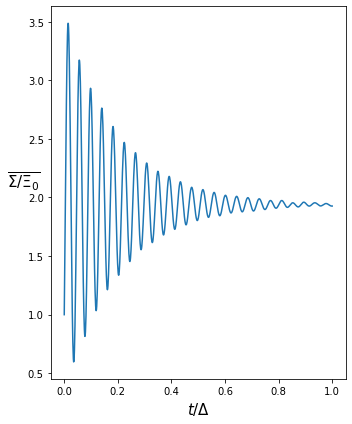

In [50]:
dist_x_ls = np.r_[np.linspace(omega_0-1000, omega_0 - 5, 100), 
                  np.linspace(omega_0-5, omega_0 + 5, 1000),
                  np.linspace(omega_0+5, omega_0 + 1000, 100)]

dist = lorentzian_dist(dist_x_ls, omega_0,
                       1/np.pi, gamma)

#print (dist)
rand_sample = random_choice(dist_x_ls, dist, N0)
print (np.shape(rand_sample))


Sigma_t_sum = Sigma_t_sum_func(rand_sample, Sigma_t_ls, p0, q0, mu1)




### plot ####
fig, ax = plt.subplots(1,1,figsize=(5, 6),
                       tight_layout = True)
ax.plot(Sigma_t_ls/Delta, Sigma_t_sum/len(rand_sample))
ax.set_ylabel(r"$\overline{\Sigma / \Xi_0}$", rotation=0, fontsize=15)
ax.set_xlabel(r"$t/\Delta$", fontsize=15)





For the quantum oscillators, we define:
$\Xi(t) = \langle \Psi | Q^2 |\Psi \rangle $

Eq. 9 defines the $\Xi(t)$ where $t>\Delta$

\begin{equation}
\Xi(t) = \Sigma(t) + \left( \frac{\mu_2 \dot{\Sigma}(\Delta)+2\mu_2^2 \Sigma (\Delta)}{\Omega^2} \right)
+\frac{2\mu_2 \Sigma (\Delta)}{\Omega} \sin 2 \Omega (t-\Delta) 
- \left( \frac{\mu_2 \dot{\Sigma}(\Delta) + 2\mu_2^2 \Sigma (\Delta)}{\Omega^2} \right) \cos 2\Omega (t-\Delta)
\end{equation}

In the paper it states that $\Sigma (\Delta)$ is of the form  $A \sin (2\Omega \Delta + \varphi) + B$.


And I am assuming $\dot{\Sigma}(\Delta)  = \frac{\delta \Sigma (\Delta)}{\delta \Delta} $ (?)

Because I missed the line in the paper that details the definition of $\Sigma (\Delta)$, and I am not sure about the values of $A$, $B$ and $\varphi$ in $\Sigma (\Delta)$. 

I accidentally defined $\Sigma (\Delta)$ and $\dot{\Sigma} (\Delta)$ by using equation 8, where $t = \Delta$:

\begin{equation}
\Sigma (\Delta) / \Xi_0 = \left( 1 + \frac{2\mu_1^2}{\Omega^2} \right) 
+ \frac{2\mu_1^2}{\Omega}\sin 2\Omega \Delta 
- \frac{2 \mu_1^2}{\Omega^2}\cos 2\Omega \Delta
\end{equation}

and 

\begin{equation}
\begin{aligned}
\dot{\Sigma}(\Delta) / \Xi_0 &= 1/\Xi_0 \frac{\delta \Sigma (\Delta) }{\delta t}\\
 &= -4\mu_1^2\cos 2\Omega \Delta - \frac{4 \mu_1^2}{\Omega}\sin 2\Omega \Delta
\end{aligned}
\end{equation}

Below is the result of using my own definition



In [57]:
def dot_Sigma_t_func(omega_, t, p_0, q_0, mu_1):
    dot_sigma_t1 = np.cos(2*omega_*t)*4*mu_1
    dot_sigma_t2 = np.sin(2*omega_*t)*4*(mu_1**2)/omega_
    return -dot_sigma_t1-dot_sigma_t2

def Xi_t_func(omega_, t, p_0, q_0, mu_1, mu_2, delta_):
    Xi_0_val = Xi_0_calc(omega_)
    
    dot_sigma_delta = Xi_0_val*dot_Sigma_t_func(omega_, delta_, p_0, q_0, mu_1)
    sigma_delta = Xi_0_val*Sigma_t_over_xi0_func(omega_, delta_, p_0, q_0, mu_1)
    
    simga_t_term = Xi_0_val*Sigma_t_over_xi0_func(omega_, t, p_0, q_0, mu_1)
    
    xi_t2 = ((mu_2*dot_sigma_delta)+(2*(mu_2**2)*sigma_delta))/(omega_**2)
    xi_t3 = np.sin(2*omega_*(t-delta_))*((2*mu_2*sigma_delta)/omega_)
    xi_t4 = np.cos(2*omega_*(t-delta_))*(((mu_2*dot_sigma_delta)+(2*(mu_2**2)*sigma_delta))/(omega_**2))
    
    return (simga_t_term + xi_t2 + xi_t3 - xi_t4)/Xi_0_val

def Xi_t_sum_func(sample_ls, t_xi_ls, p_0, q_0, mu_1, mu_2, delta_):
    Xi_t_sum = 0.0
    for i in range(len(sample_ls)):
        omega_i = sample_ls[i]
        Xi_t_i = Xi_t_func(omega_i, t_xi_ls, p_0, q_0, mu_1, mu_2, delta_)
        Xi_t_sum += Xi_t_i
    return Xi_t_sum


Text(0.5, 0, '$t/\\Delta$')

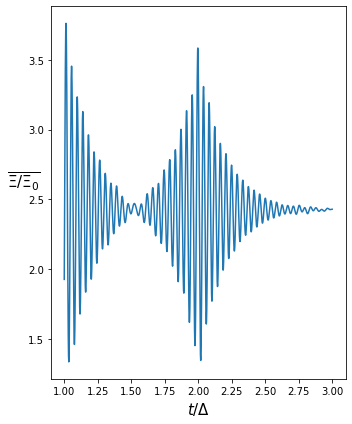

In [58]:
Xi_t_sum = Xi_t_sum_func(rand_sample, Xi_t_ls, p0, q0, mu1, mu2, Delta)


### plot ####
fig, ax = plt.subplots(1,1,figsize=(5, 6),
                       tight_layout = True)
ax.plot(Xi_t_ls/Delta, Xi_t_sum/len(rand_sample))


ax.set_ylabel(r"$\overline{\Xi / \Xi_0}$", rotation=0, fontsize=15)
ax.set_xlabel(r"$t/\Delta$", fontsize=15)



Text(0.5, 0, '$t/\\Delta$')

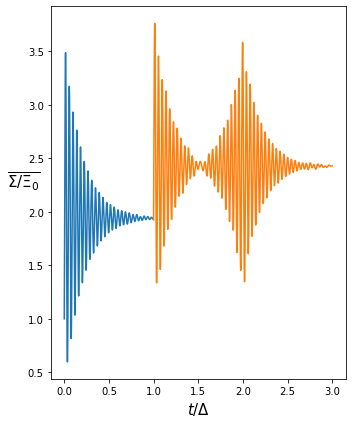

In [59]:
### plot ####
fig, ax = plt.subplots(1,1,figsize=(5, 6),
                       tight_layout = True)
ax.plot(Sigma_t_ls/Delta, Sigma_t_sum/len(rand_sample))

ax.plot(Xi_t_ls/Delta, Xi_t_sum/len(rand_sample))
ax.set_ylabel(r"$\overline{\Sigma / \Xi_0}$", rotation=0, fontsize=15)
ax.set_xlabel(r"$t/\Delta$", fontsize=15)

